In [ ]:
#Lägger till denna kommentar då jag får invalid error i github för att testa om det funkar.

Klassificering med 1-NN
Punkt 1: [25. 32.] => Pikachu
Punkt 2: [24.2 31.5] => Pikachu
Punkt 3: [22. 34.] => Pikachu
Punkt 4: [20.5 34. ] => Pichu

Klassificering med 10-NN
Punkt 1: [25. 32.] => Pikachu
Punkt 2: [24.2 31.5] => Pikachu
Punkt 3: [22. 34.] => Pikachu
Punkt 4: [20.5 34. ] => Pichu

Klassificering av användarens punkt


Din punkt [56.  3.] klassificerades som: Pikachu


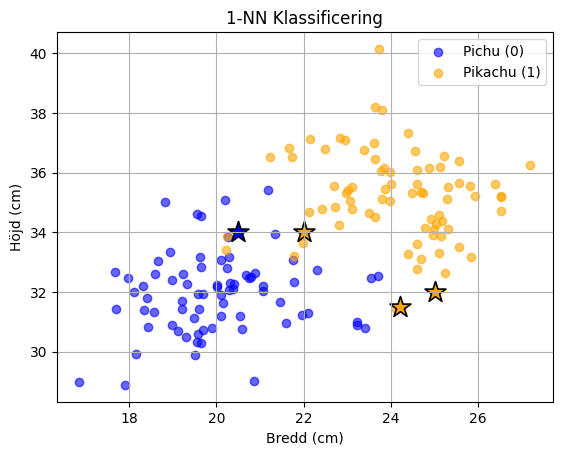

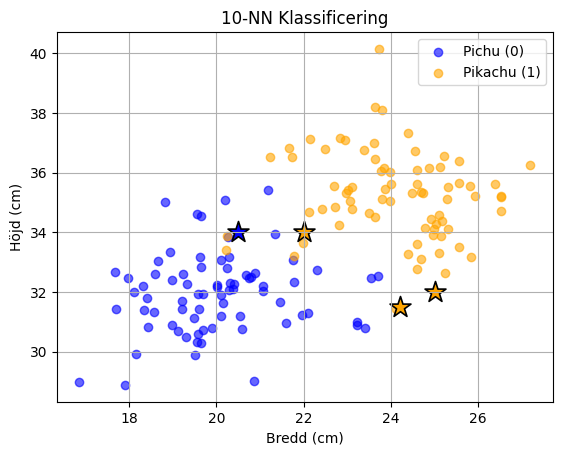

Körning 1: Accuracy = 96.00% (TP=24, TN=24, FP=1, FN=1)
Körning 2: Accuracy = 96.00% (TP=24, TN=24, FP=1, FN=1)
Körning 3: Accuracy = 100.00% (TP=25, TN=25, FP=0, FN=0)
Körning 4: Accuracy = 98.00% (TP=24, TN=25, FP=0, FN=1)
Körning 5: Accuracy = 94.00% (TP=23, TN=24, FP=1, FN=2)
Körning 6: Accuracy = 94.00% (TP=23, TN=24, FP=1, FN=2)
Körning 7: Accuracy = 98.00% (TP=24, TN=25, FP=0, FN=1)
Körning 8: Accuracy = 88.00% (TP=21, TN=23, FP=2, FN=4)
Körning 9: Accuracy = 96.00% (TP=24, TN=24, FP=1, FN=1)
Körning 10: Accuracy = 98.00% (TP=24, TN=25, FP=0, FN=1)


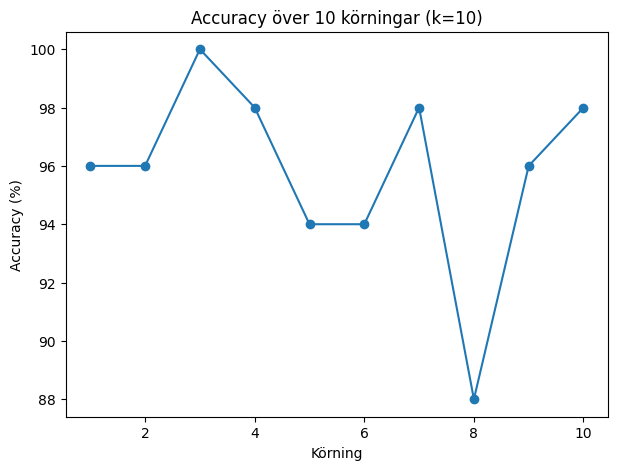


Medelaccuracy: 95.80%


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import math
import random


def distance(p1, p2):
    """
    Beräkna euklidiskt avstånd
    """
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def load_datapoints(path_datapoints: str, as_numpy=True):
    """
    Ladda datapunkter från fil.

    Parametrar:
        path_datapoints : String
        as_numpy : Bool
            True  returnerar (X, y) som numpy-arrays
            False returnerar lista med width, height, label

    Returnerar:
        X, y om as_numpy=True
        list[(float, float, int)] om as_numpy=False
    """
    if as_numpy:
        data = np.loadtxt(path_datapoints, delimiter=",", skiprows=1)
        X = data[:, :2] #koordinater
        y = data[:, 2].astype(int)  #(0 = Pichu, 1 = Pikachu)
        return X, y
    else:
        datapoints = []
        with open(path_datapoints) as f:
            next(f)
            for line in f:
                width, height, label = line.strip().split(",")
                datapoints.append((float(width), float(height), int(label)))
        return datapoints

def load_testpoints(path_testpoints: str):
    """
    Ladda testpunkter från fil.
    Returnerar numpy-array.
    """
    testpoints = []
    with open(path_testpoints) as f:
        next(f)
        for line in f:
            line = line.strip()
            if not line or "(" not in line or ")" not in line:
                continue
            coords = line.split("(")[1].split(")")[0]
            width, height = coords.split(",")
            testpoints.append([float(width), float(height)])
    return np.array(testpoints)

def classify_knn(test_point: tuple[float, float], data: list, y=None, k=10):
    """
    Klassificera punkt med 10 närmaste grannar (k-NN).

    Stödjer två datatyper:
        - numpy-arrays (X, y)
        - lista med (width, height, label)

    Parametrar:
        test_point : (float, float)
        data : np.ndarray eller list
        y : np.ndarray eller None
        k : antal närmaste grannar

    Returnerar:
        int (0 = Pichu, 1 = Pikachu)
    """
    if y is not None:
        #Om numpy-array
        distances = np.linalg.norm(data - test_point, axis=1)
        idx_sorted = np.argsort(distances)[:k]
        k_labels = y[idx_sorted]
    else:
        # Om lista
        distances = [(distance(test_point, (x, h)), label) for x, h, label in data]
        distances.sort(key=lambda d: d[0])
        k_labels = [label for _, label in distances[:k]]

    # Majoritetsröstning
    return Counter(k_labels).most_common(1)[0][0]

def get_user_point():
    """
    Läs in punkt från användaren med felhantering.
    Returnerar en numpy-array [width, height].
    """
    while True:
        try:
            width = float(input("Ange bredd: "))
            height = float(input("Ange höjd: "))
            if width <= 0 or height <= 0:
                print("Bredd och höjd måste vara större än 0.")
                continue
            return np.array([width, height])
        except ValueError:
            print("Fel inmatning. Ange numeriska värden.")

def plot_data(X, y, testpoints, predictions, title="Klassificering"):
    """
    Plotta träningsdata och testpunkter.
    Blå = Pichu
    Orange = Pikachu.
    Testpunkter ritas som stjärnor.
    """
    pichu = X[y == 0]
    pikachu = X[y == 1]

    # Plotta träningsdata
    plt.scatter(pichu[:,0], pichu[:,1], c="blue", label="Pichu (0)", alpha=0.6)
    plt.scatter(pikachu[:,0], pikachu[:,1], c="orange", label="Pikachu (1)", alpha=0.6)

    # Plotta testpunkter
    for (x, y_val), label in zip(testpoints, predictions):
        color = "blue" if label == 0 else "orange"
        plt.scatter(x, y_val, c=color, marker="*", s=250,
                    edgecolor="black", linewidth=1.2)

    plt.xlabel("Bredd (cm)")
    plt.ylabel("Höjd (cm)")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

def split_data(datapoints):
    """
    Datapunkter uppdelade i träningsmängd och testmängd.
    Returnerar två listor: train, test.
    """
    pikachu = [p for p in datapoints if p[2] == 1]
    pichu = [p for p in datapoints if p[2] == 0]

    random.shuffle(pikachu)
    random.shuffle(pichu)

    train = pikachu[:50] + pichu[:50]
    test = pikachu[50:75] + pichu[50:75]

    random.shuffle(train)
    random.shuffle(test)

    return train, test

# JAg förstår inte helt confusion matrix men blev rekommenderad att använda det av en kompis om jobbar med IT. Har kollat upp på w3schools och lagt in sökning i chatgpt om det.

def evaluate_confusion_matrix(testpoints, train, k=10):      
    """
    Utvärdera k-NN med en confusion matrix.
    Returnerar accuracy och (TP, TN, FP, FN).
    """
    TP = TN = FP = FN = 0
    
    for width, height, true_label in testpoints:
        pred = classify_knn((width, height), train, k=k)
        
        if pred == 1 and true_label == 1:
            TP += 1
        elif pred == 0 and true_label == 0:
            TN += 1
        elif pred == 1 and true_label == 0:
            FP += 1
        elif pred == 0 and true_label == 1:
            FN += 1
    
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    return accuracy, TP, TN, FP, FN

def repeat_experiment(datapoints, k=10, runs=10):
    """
    Repetera train/test-split, beräkna accuracy.
    Returnerar lista av accuracies och medelaccuracy.
    """
    accuracies = []
    for i in range(runs):
        train, test = split_data(datapoints)
        acc, TP, TN, FP, FN = evaluate_confusion_matrix(test, train, k)
        print(f"Körning {i+1}: Accuracy = {acc*100:.2f}% (TP={TP}, TN={TN}, FP={FP}, FN={FN})")
        accuracies.append(acc)
    
    # Plotta accuracy över körningarna
    plt.figure(figsize=(7,5))
    plt.plot(range(1, runs+1), [a*100 for a in accuracies], marker="o")
    plt.xlabel("Körning")
    plt.ylabel("Accuracy (%)")
    plt.title(f"Accuracy över {runs} körningar (k={k})")
    plt.show()

    mean_acc = sum(accuracies) / runs
    print(f"\nMedelaccuracy: {mean_acc*100:.2f}%")
    return accuracies, mean_acc

if __name__ == "__main__":
    
    # Ladda tränings- och testdata
    X, y = load_datapoints("datapoints.txt", as_numpy=True)
    testpoints = load_testpoints("testpoints (1).txt")

    # Klassificering med 1-NN
    print("Klassificering med 1-NN")
    predictions_1nn = []
    for i, point in enumerate(testpoints, 1):
        label = classify_knn(point, X, y, k=1)  # 1-NN = k=1
        predictions_1nn.append(label)
        print(f"Punkt {i}: {point} => {'Pikachu' if label == 1 else 'Pichu'}")

    # Klassificering med 10-NN
    print("\nKlassificering med 10-NN")
    predictions_knn = []
    for i, point in enumerate(testpoints, 1):
        label = classify_knn(point, X, y, k=10)
        predictions_knn.append(label)
        print(f"Punkt {i}: {point} => {'Pikachu' if label == 1 else 'Pichu'}")

    # Användarinmatning
    print("\nKlassificering av användarens punkt")
    user_point = get_user_point()
    user_label = classify_knn(user_point, X, y, k=10)
    print(f"Din punkt {user_point} klassificerades som: {'Pikachu' if user_label == 1 else 'Pichu'}")

    # Visualisering
    plot_data(X, y, testpoints, predictions_1nn, title="1-NN Klassificering")
    plot_data(X, y, testpoints, predictions_knn, title="10-NN Klassificering")

    # Utvärdering (train/test-split)
    datapoints = load_datapoints("datapoints.txt", as_numpy=False)
    accuracies, mean_acc = repeat_experiment(datapoints, k=10, runs=10)